# Shapelets and the Shapelet Transform with sktime

In [1]:
from sktime.datasets import load_gunpoint
from sktime.transformers.shapelets import ContractedShapeletTransform

In [2]:
train_X, train_y = load_gunpoint(split='TRAIN', return_X_y=True)
test_X, test_y = load_gunpoint(split='TEST', return_X_y=True)

## Shapelet Transform

In [3]:
# 提取shapelets的时间（以分钟为单位），这是一个简单的下边界初始化。
time_limit_in_mins = 0.1
# 每个训练样本序列候选的shapelets的数目
initial_num_shapelets_per_case = 10
verbose = 2

st = ContractedShapeletTransform(
    time_limit_in_mins=time_limit_in_mins,
    num_candidates_to_sample_per_case=initial_num_shapelets_per_case,
    verbose=verbose)
st.fit(train_X, train_y)


visiting series: 41 (#1)
Candidate finished. 00:05 remaining
Candidate finished. 00:05 remaining
Candidate finished. 00:05 remaining
Candidate finished. 00:05 remaining
Candidate finished. 00:05 remaining
Candidate finished. 00:05 remaining
Candidate finished. 00:04 remaining
Candidate finished. 00:04 remaining
Candidate finished. 00:04 remaining
Candidate finished. 00:04 remaining
visiting series: 31 (#2)
Candidate rejected. 00:04 remaining
Candidate finished. 00:03 remaining
Candidate finished. 00:03 remaining
Candidate finished. 00:03 remaining
Candidate finished. 00:03 remaining
Candidate finished. 00:03 remaining
Candidate finished. 00:02 remaining
Candidate finished. 00:02 remaining
Candidate finished. 00:02 remaining
Candidate finished. 00:02 remaining
visiting series: 26 (#3)
Candidate finished. 00:02 remaining
Candidate finished. 00:02 remaining
Candidate finished. 00:01 remaining
Candidate finished. 00:01 remaining
Candidate finished. 00:01 remaining
Candidate finished. 00:01

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

st.shapelets

In [5]:
st.shapelets[0]

### 绘制提取的shapelet

Series ID: 26, start_pos: 1, length: 91, info_gain: 0.4952109364879217, 


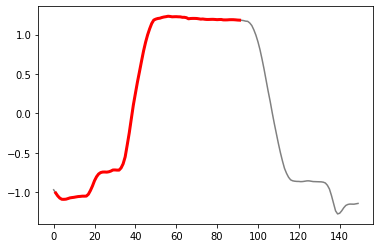

Series ID: 31, start_pos: 106, length: 44, info_gain: 0.409836573411528, 


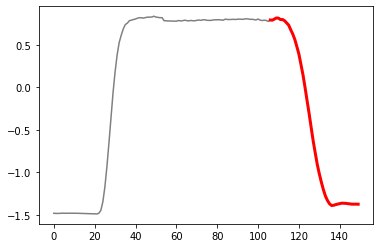

Series ID: 41, start_pos: 0, length: 42, info_gain: 0.3347753899093233, 


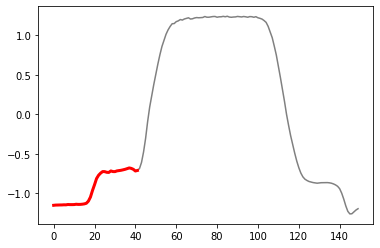

Series ID: 31, start_pos: 9, length: 76, info_gain: 0.3250332157960758, 


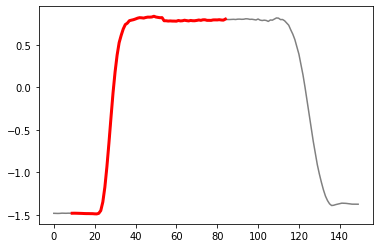

Series ID: 39, start_pos: 56, length: 44, info_gain: 0.16512691609969987, 


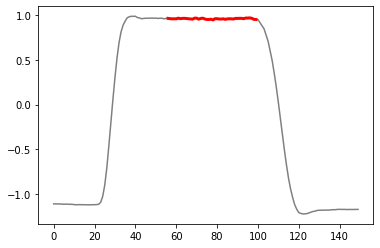

In [9]:
# 对每个提取的shapelet
for s in st.shapelets[0:5]:
    print(s)
    
    # 绘制样本序列
    plt.plot(
        train_X.iloc[s.series_id, 0],
        'gray'
    )
    # 在样本序列中绘制抽取的shapelet
    plt.plot(
        list(range(s.start_pos, s.start_pos + s.length)),
        train_X.iloc[s.series_id, 0][s.start_pos:s.start_pos+s.length],
        'r',
        linewidth=3.0
    )
    plt.show()

### 将每个提取的shapelet绘制到同一个图中

#0: Series ID: 26, start_pos: 1, length: 91, info_gain: 0.4952109364879217, 
#1: Series ID: 31, start_pos: 106, length: 44, info_gain: 0.409836573411528, 
#2: Series ID: 41, start_pos: 0, length: 42, info_gain: 0.3347753899093233, 
#3: Series ID: 31, start_pos: 9, length: 76, info_gain: 0.3250332157960758, 
#4: Series ID: 39, start_pos: 56, length: 44, info_gain: 0.16512691609969987, 


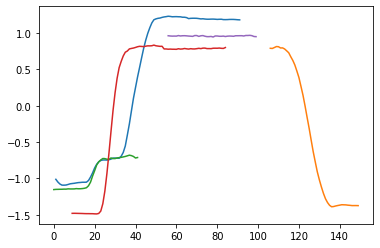

In [10]:
for i in range(0, min(len(st.shapelets), 5)):
    s = st.shapelets[i]
    # 有关shapelet的摘要信息
    print("#" + str(i) + ": " + str(s))
    
    # 叠加绘制shapelets
    plt.plot(
        list(range(s.start_pos, (s.start_pos + s.length))),
        train_X.iloc[s.series_id, 0][s.start_pos:s.start_pos + s.length]
    )
plt.show()

## 使用shapelet进行时间序列分类 

In [11]:
import time
import numpy as np
from sktime.datasets import load_gunpoint
from sktime.transformers.shapelets import ContractedShapeletTransform
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [17]:
np.random.seed(seed=0)
train_X, train_y = load_gunpoint(split="TRAIN", return_X_y=True)
teset_X, test_y = load_gunpoint(split="TEST", return_X_y=True)

# 
pipeline = Pipeline([
    ('st', ContractedShapeletTransform(time_limit_in_mins=0.1,
                                      num_candidates_to_sample_per_case=10,
                                      verbose=False)),
    ('rf', RandomForestClassifier(n_estimators=100)),
])

start=time.time()
pipeline.fit(train_X, train_y)
end_biuld = time.time()
preds = pipeline.predict(test_X)
end_test = time.time()

print("Results: ")
print("Correct: ")
correct = sum(preds == test_y)
print("\t" + str(correct) + "/" + str(len(test_y)))
print("\t" + str(correct/len(test_y)))
print("\nTiming:")
print("\tTo build: " + str(end_biuld - start) + " secs")
print("\tTo predict: " + str(end_test - end_biuld) + " secs")

Results: 
Correct: 
	143/150
	0.9533333333333334

Timing:
	To build: 6.9254724979400635 secs
	To predict: 3.293217420578003 secs
